In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Input, concatenate
from keras import regularizers
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

import os
from os import listdir

import joblib
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Подготовка данных**

In [ ]:
#ФОРМИРОВАНИЕ X_TRAIN
f1 = open("/content/gdrive/MyDrive/Colab Notebooks/yolokeras/annot_all_without10.txt", 'r')

folder_dir_1 = "/content/gdrive/MyDrive/Colab Notebooks/yolokeras"
folder_dir_2 = "/content/gdrive/MyDrive/Colab Notebooks/cut_pictures"

folder_dir_3 = "/content/gdrive/MyDrive/Colab Notebooks/for_test"
folder_dir_4 = "/content/gdrive/MyDrive/Colab Notebooks/for_test/cut"

x_train_img1 = []
x_train_img2 = []

#check_only = []

#one_for_pred = []

count = 0
#for image_1 in os.listdir(folder_dir_1):
count_for_stop = 0

for i in f1:#id и pop
    #if count_for_stop < 1694 and count_for_stop > 400:
    if count_for_stop == 1200:
        break
    image_1 = i.split()[0]

    # if image_1[0] == '0':
    #     break

    fl_1 = 0
    fl_2 = 0

    for image_2 in os.listdir(folder_dir_2):
        if image_2.endswith(".jpg"):
            fl_1 = 1
            if image_1 == image_2[4:]: #без 'cut_'

                fl_2 = 1
                if count_for_stop == 401 or count_for_stop == 1693:
                    print(image_1)
                img1 = cv2.imread(folder_dir_1 + "/" + image_1)
                img2 = cv2.imread(folder_dir_2 + "/" + image_2)
                img2 = cv2.resize(img2, (152, 152))

                np_img_1 = np.array(img1)
                np_img_2 = np.array(img2)

                x_train_img1.append(np_img_1)
                x_train_img2.append(np_img_2)

                #check_only.append(image_1)

                if count == 3 or count == 11 or count == 111:
                    print(image_1, " - ", image_2)
                count += 1
    if fl_1 == 0 and fl_2 == 0 or fl_1 == 1 and fl_2 == 0:
        print(count_for_stop)
        # else:
        #     print(image_2, " <-")
                # if count == 4:
                #     one_for_pred.append(np.concatenate((np_img_1, np_img_2), axis=2))

                #print(np_image_concatenated.shape)
    count_for_stop += 1
#print(count)
f1.close()
#count = 0

# f2 = open("/content/gdrive/MyDrive/Colab Notebooks/for_test/annot_all_10.txt", 'r')


# #for image_3 in os.listdir(folder_dir_3):
# for i in f2:
#     image_3 = i.split()[0]
#     for image_4 in os.listdir(folder_dir_4):
#         if (image_4.endswith(".jpg")):
#               if image_3 == image_4[4:]: #без 'cut_'

#                 img3 = cv2.imread(folder_dir_3 + "/" + image_3)
#                 img4 = cv2.imread(folder_dir_4 + "/" + image_4)

#                 np_img_3 = np.array(img3)
#                 np_img_4 = np.array(img4)

#                 np_image_concatenated_test.append(np.concatenate((np_img_3, np_img_4), axis=2))
#                 count += 1
# f2.close()
# print(count)

IMG20231104183336_jpg.rf.972e069515a20ffaf4226f0160146a02.jpg  -  cut_IMG20231104183336_jpg.rf.972e069515a20ffaf4226f0160146a02.jpg
-trashed-1704136212-IMG20231031132706_jpg.rf.410ff28bc3340bda41740301c109776b.jpg  -  cut_-trashed-1704136212-IMG20231031132706_jpg.rf.410ff28bc3340bda41740301c109776b.jpg
IMG20211229144346_jpg.rf.ca79df71c4cc40f0ad98ec5e338a63d8.jpg  -  cut_IMG20211229144346_jpg.rf.ca79df71c4cc40f0ad98ec5e338a63d8.jpg
IMG20230610232709_jpg.rf.8ac7ab4b5572cda03dcb2872de9d2588.jpg
813
824
1193


In [ ]:
print(len(x_train_img1))
print(len(x_train_img2))

1197
1197


In [ ]:
f1 = open("/content/gdrive/MyDrive/Colab Notebooks/yolokeras/annot_all_without10.txt", 'r')

folder_dir_2 = "/content/gdrive/MyDrive/Colab Notebooks/cut_pictures"
count = 0
for i in f1:
    fl = 0
    im = i.split()[0]
    for j in check_only:
        if im == j:
            fl = 1
    if fl == 0:
        print(im, " - ", count)
    count += 1
#print(check_only[3])

f1.close()

NameError: name 'check_only' is not defined

In [ ]:
#y_train и y_test сравнить совпадение x и y (вдруг перемешались)
y_train = []
#dictionary = {'xmin': 10, 'ymin': 20, 'xmax': 50, 'ymax': 70, 'class': 0}


# for key, value in dictionary.items():
#     print(key, value)

count = 0
f = open("/content/gdrive/MyDrive/Colab Notebooks/yolokeras/annot_all_without10.txt", 'r')
for i in f:

    if count == 1200:
        break

    # image_1 = i.split()[0]
    # if image_1[0] == '0':
    #     break

    dictionary = {}

    x = ""
    y = ""
    w = ""
    h = ""
    belong = ""

    #name_35_ = i[:35]
    id = 1
    flag = 0

    #----------------получили координаты
    for j in i:
        if j == " ":
            flag = 1
        elif flag == 1 and j != ",":
            x += j

        elif j == "," and id == 1:
            flag = 2
            id = 2
        elif flag == 2 and j != ",":
            y += j

        elif j == "," and id == 2:
            flag = 3
            id = 3
        elif flag == 3 and j != ",":
            w += j

        elif j == "," and id == 3:
            flag = 4
            id = 4
        elif flag == 4 and j != ",":
            h += j

        elif j == "," and id == 4:
            flag = 5
            id = 5
        elif flag == 5 and j != ",":
            belong += j

    dictionary['xmin'] = x
    dictionary['ymin'] = y
    dictionary['xmax'] = w
    dictionary['ymax'] = h
    # if belong == "":
    #     dictionary['class'] = '1'
    # else:
    #     dictionary['class'] = belong

    y_train.append(dictionary)

    # if count == 3 or count == 10 or count == 111:
    #     print(y_train[count])
    count += 1

f.close()
indices = [813, 824, 1193]
for i in sorted(indices, reverse=True):
    del y_train[i]

# y_train.pop(813)#если pop то индексы уже другие!!!!!!!!!!-----------<<<<<<<<<<<<<<<
# y_train.pop(824)
# y_train.pop(1193)
#y_train.pop(1265)

In [ ]:
print(len(y_train))

1197


In [ ]:
y_train_array = np.zeros((1197, 4)) # Создаем массив с нулями

idx = 0
#print(y_train['ymin'])
for annotations in y_train:
    #print(annotations.get('xmin'), " <<----")
    #for obj in annotations:
        #print(obj)
    ymin = annotations.get('ymin')
    xmin = annotations.get('xmin')
    ymax = annotations.get('ymax')
    xmax = annotations.get('xmax')
    #label = annotations.get('class')

    if xmin == "": xmin = -1
    if ymin == "": ymin = -1
    if xmax == "": xmax = -1
    if ymax == "": ymax = -1#--------------------------------------<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

    y_train_array[idx] = [xmin, ymin, xmax, ymax]
    idx += 1

In [ ]:
print(y_train_array[3])

[-1. -1. -1. -1.]


In [ ]:
del y_train

In [ ]:
# from IPython import get_ipython
# get_ipython().run_line_magic('reset_selective', '-f y_train')

import gc
gc.collect()

0

In [ ]:
#НОРМАЛИЗАЦИЯ ПИКСЕЛЕЙ
x_train_img1 = np.array(x_train_img1)
x_train_img2 = np.array(x_train_img2)

x_train_img1 = x_train_img1 / 255
x_train_img2 = x_train_img2 / 255

In [ ]:
print(x_train_img1.shape)
print(x_train_img2.shape)

(1197, 352, 352, 3)
(1197, 152, 152, 3)


In [ ]:
from sklearn.model_selection import train_test_split
x_train_img1, x_val_img1, x_train_img2, x_val_img2, y_train_array, y_val = train_test_split(x_train_img1, x_train_img2, y_train_array, test_size=0.25, shuffle=True)


#X1_train, X1_val, X2_train, X2_val, Y_train, Y_val = train_test_split(X1, X2, Y, test_size=0.2, random_state=42)


In [ ]:
print(y_val.shape)

(300, 4)


In [ ]:
bbox_y_train = []
#class_y_train = []

bbox_y_val = []
#class_y_val = []

for i in range(len(y_train_array)):
    bbox_y_train.append(y_train_array[i][:4])
    #class_y_train.append(y_train_array[i][4])

for i in range(len(y_val)):
    bbox_y_val.append(y_val[i][:4])
    #class_y_val.append(y_val[i][4])

bbox_y_train = np.array(bbox_y_train)
#class_y_train = np.array(class_y_train)
bbox_y_val = np.array(bbox_y_val)
#class_y_val = np.array(class_y_val)

**Модель CNN**

In [ ]:
input_img1 = Input(shape=(352,352,3))
input_img2 = Input(shape=(152,152,3))

# Слой свертки и пулинга для первого изображения
x = Conv2D(32, (3, 3), activation='relu', padding='same',strides=(1,1))(input_img1)
x = MaxPool2D((2, 2), strides=2)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same',strides=(1,1), kernel_regularizer=regularizers.l2(0.01))(x)
x = MaxPool2D((2, 2), strides=2)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1,1))(x)
x = Dropout(0.3)(x)
x = MaxPool2D((2, 2), strides=2)(x)

#x = Conv2D(128, (4,4), activation='relu', padding='same', strides=(4,4), kernel_regularizer=regularizers.l2(0.01))(x)
x = Flatten()(x)

# Слой свертки и пулинга для второго изображения
y = Conv2D(32, (3, 3), activation='relu', padding='same',strides=(1,1))(input_img2)
y = MaxPool2D((2, 2), strides=2)(y)

y = Conv2D(64, (3, 3), activation='relu', padding='same',strides=(1,1), kernel_regularizer=regularizers.l2(0.01))(y)
y = MaxPool2D((2, 2), strides=2)(y)

y = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1,1))(y)
y = Dropout(0.3)(y)
y = MaxPool2D((2, 2), strides=2)(y)

#y = Conv2D(128, (3,3), activation='relu', padding='same', strides=(2,2), kernel_regularizer=regularizers.l2(0.01))(y)
y = Flatten()(y)

# Объединение двух входных слоев
combined = concatenate([x, y])

combined = Dense(128, activation='relu')(combined)
combined = Dropout(0.3)(combined)
combined = Dense(64, activation = 'relu')(combined)

# Регрессионный выход для bbox
bbox_output = Dense(4, name='bounding_box')(combined)  # Предполагая, что у вас 4 координаты для bbox (x, y, width, height)

# Классификационный выход для классов
#class_output = Dense(1, activation='sigmoid', name='class_output')(combined)

# Создание модели с двумя входами и двумя выходами
model = Model(inputs=[input_img1, input_img2], outputs=bbox_output)

#print(model.summary())

# Конфигурация функций потерь и метрик для каждого выхода
model.compile(optimizer='adam',
              loss={'bounding_box': 'mean_squared_error'},
              metrics={'bounding_box': ['accuracy', 'mae']})

In [ ]:
#early_stopping_callback = EarlyStopping(monitor='val_class_output_accuracy', min_delta=0.01, patience=10, mode='max', baseline=0.98)
model_checkpoint_callback = ModelCheckpoint(filepath='weights.{epoch:02d}.h5', save_weights_only=True, save_freq=10)

In [ ]:
model = load_model('/content/gdrive/MyDrive/Colab Notebooks/CNN 2in 2out/CNN_2in_2out(11).keras')

OSError: No file or directory found at /content/gdrive/MyDrive/Colab Notebooks/CNN 2in 2out/CNN_2in_2out(11).keras

In [ ]:
model.compile(optimizer='adam',
              loss={'bounding_box': 'mean_squared_error', 'class_output': 'binary_crossentropy'},
              metrics={'bounding_box': ['accuracy'], 'class_output': ['accuracy']})

In [ ]:
epoch = 55 # we can set it to a large value because there is early stopping

history = model.fit([x_train_img1, x_train_img2], bbox_y_train, batch_size = 10,
                    epochs = epoch,
                    validation_data = ([x_val_img1, x_val_img2], bbox_y_val),
                    verbose = 1,
                    #steps_per_epoch = x_train.shape[0] // 64,
                    callbacks = model_checkpoint_callback)

# model.stop_training = True

Epoch 1/55
90/90 [==============================] - 421s 5s/step - loss: 14202.5938 - accuracy: 0.3133 - mae: 100.5340 - val_loss: 12011.5674 - val_accuracy: 0.2767 - val_mae: 92.6310
Epoch 2/55
90/90 [==============================] - 400s 4s/step - loss: 12712.5732 - accuracy: 0.2765 - mae: 97.9304 - val_loss: 12288.3896 - val_accuracy: 0.2700 - val_mae: 92.1662
Epoch 3/55
90/90 [==============================] - 388s 4s/step - loss: 12143.0928 - accuracy: 0.2776 - mae: 95.3632 - val_loss: 11441.3135 - val_accuracy: 0.2767 - val_mae: 91.8138
Epoch 4/55
90/90 [==============================] - 387s 4s/step - loss: 11911.9697 - accuracy: 0.2988 - mae: 94.3086 - val_loss: 12961.2432 - val_accuracy: 0.2800 - val_mae: 91.9252
Epoch 5/55
90/90 [==============================] - 385s 4s/step - loss: 12166.3262 - accuracy: 0.2977 - mae: 95.3827 - val_loss: 12228.5869 - val_accuracy: 0.2733 - val_mae: 91.6592
Epoch 6/55
90/90 [==============================] - 386s 4s/step - loss: 11454.2939 

In [ ]:
model.save('/content/gdrive/MyDrive/Colab Notebooks/CNN 2in 2out/CNN_2in_2out(14-4base).keras')

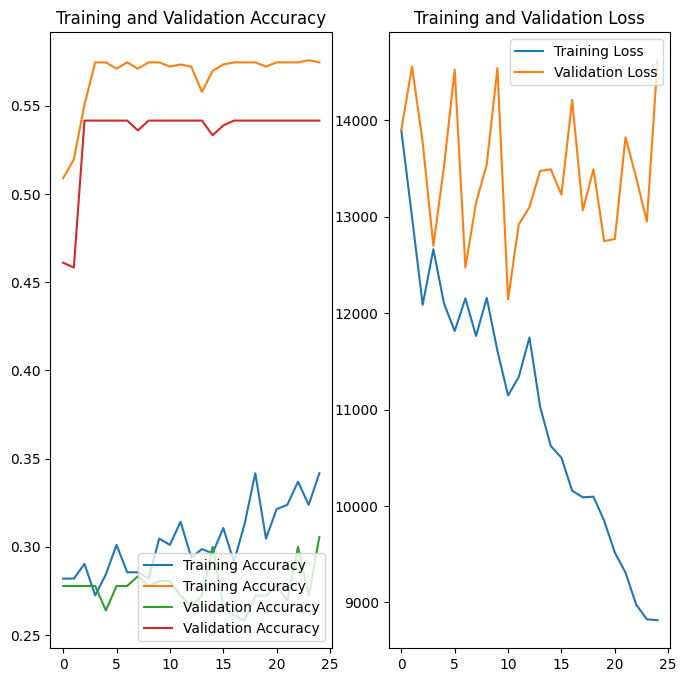

In [ ]:
acc = history.history['class_output_accuracy']
val_acc = history.history['val_class_output_accuracy']
acc1 = history.history['bounding_box_accuracy']
val_acc1 = history.history['val_bounding_box_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(55)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc1, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc1, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("3_Training and Validation Accuracy and Loss.png", dpi=150)
plt.show()

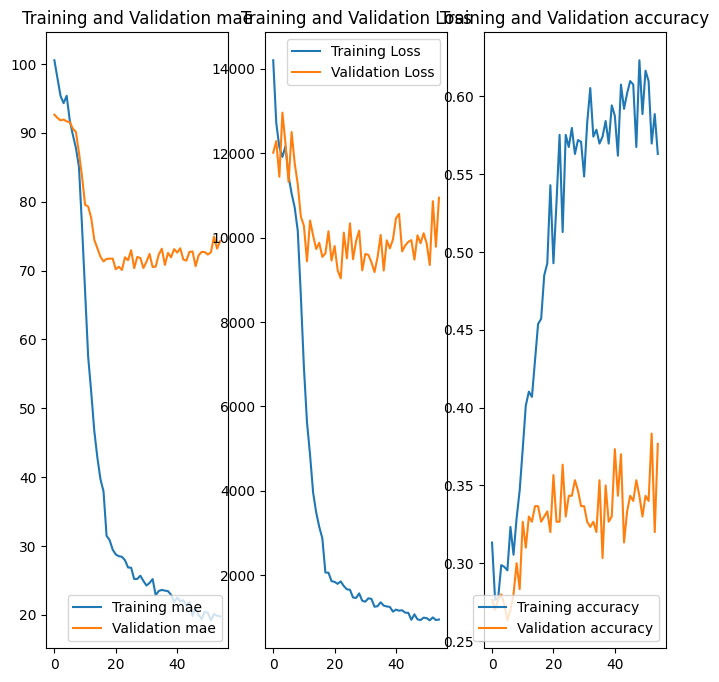

In [ ]:
acc = history.history['mae']
val_acc = history.history['val_mae']
acc1 = history.history['accuracy']
val_acc1 = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(55)

plt.figure(figsize=(8, 8))
plt.subplot(1, 3, 1)
plt.plot(epochs_range, acc, label='Training mae')
plt.plot(epochs_range, val_acc, label='Validation mae')
plt.legend(loc='lower right')
plt.title('Training and Validation mae')

plt.subplot(1, 3, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(1, 3, 3)
plt.plot(epochs_range, acc1, label='Training accuracy')
plt.plot(epochs_range, val_acc1, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')

plt.savefig("3_Training and Validation Accuracy and Loss.png", dpi=150)
plt.show()

In [ ]:
#МЕСТО ДЛЯ ТЕСТА CNN НА ИЗОБРАЖЕНИЯХ
width = 352
height = 352

path_to_full_img = '/content/gdrive/MyDrive/Colab Notebooks/rPBZ6fKT-tY.jpg'
path_to_object_img = '/content/gdrive/MyDrive/Colab Notebooks/rPBdddZ6fKT-tY.jpg'


full_img = cv2.imread(path_to_full_img)
full_img = cv2.resize(full_img, (width, height))

full_img = full_img / 255.0


object_img = cv2.imread(path_to_object_img)
object_img = cv2.resize(object_img, (152, 152))

# old_image_height, old_image_width, channels = object_img.shape
# color = (255,255,255)
# result = np.full((height,width, channels), color, dtype=np.uint8)
# x_center = (width - old_image_width) // 2
# y_center = (height - old_image_height) // 2
# result[y_center:y_center+old_image_height,
#     x_center:x_center+old_image_width] = object_img

# object_img = result
object_img = object_img / 255.0

full_img = np.expand_dims(full_img, axis=0)
object_img = np.expand_dims(object_img, axis=0)

#print(full_img.shape, '\n', object_img.shape)

#overall_img = np.concatenate((full_img, object_img), axis=2)
#overall_img = np.expand_dims(overall_img, axis=0)

#model = load_model('/content/gdrive/MyDrive/Colab Notebooks/weights/cnn_model.h5')

predictions = model.predict([full_img, object_img])
print(predictions)

bb = np.array([124.0, 94.0, 180.0, 192.0])
bb = np.expand_dims(bb, axis=0)

cc = np.array([0.0])
res = model.evaluate([full_img, object_img], [bb, cc])
print(res)

1/1 [==============================] - 0s 412ms/step
[[ 33.450134  84.845825  69.81689  106.580315]]
1/1 [==============================] - 1s 545ms/step - loss: 6931.2373 - accuracy: 1.0000 - mae: 73.8267
[6931.2373046875, 1.0, 73.82670593261719]
